# 6. NVT
An additional NVT equilibration is performed to ensure the 2D slab structure is in stable state. NVT means fixed atoms and volume, and constant temperature.

## 6.1. Copy files

In [1]:
from pathlib import Path
from shutil import copy
cwd = Path.cwd()

source = cwd.parent/'5. Unwrap'
copy(source/'data.new.lmp', cwd/'data.lmp')
copy(source/'in.spe', cwd)

source = cwd.parent/'4. NPT'
copy(source/'CH.airebo', cwd)

'c:\\Users\\fitbe\\Desktop\\AO Tutorial\\LAMMPS\\6. NVT\\CH.airebo'

## 6.2. Input file

In [2]:
%%writefile in.lmp
#---------- Initization ----------#
units metal
dimension 3
boundary p p s              # non-periodic in z-direction
atom_style charge

#---------- structure ----------#
read_data data.lmp

#---------- Force Field ----------#
pair_style airebo 3.0
pair_coeff * * CH.airebo C H

#---------- Simulation ----------#
# Timestep
timestep 0.0005              # Timestep in ps
variable ttotal equal 10     # Total simulation time in ps
variable thermo equal 100    # Number of thermo data
variable dump equal 100      # Number of dump frames
variable Ntotal equal ${ttotal}/dt
variable Nthermo equal ${Ntotal}/${thermo}
variable Ndump equal ${Ntotal}/${dump}

# Variables
variable Tset equal 300
variable Tdamp equal 100*dt

# Fix
fix 1 all nvt temp ${Tset} ${Tset} ${Tdamp}

# Thermo
thermo ${Nthermo}
thermo_style custom step time temp pe press lz density

# Dump
dump 1 all custom ${Ndump} dump.lmp id type element mass x y z vx vy vz
dump_modify 1 element C H

run ${Ntotal}

#---------- End ----------#
write_data data.new.lmp

Overwriting in.lmp


## 6.3. Run LAMMPS

In [4]:
!lmp -i in.lmp -l log.lmp

LAMMPS (2 Aug 2023 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from C:\Users\fitbe\AppData\Local\LAMMPS 64-bit 2Aug2023 with GUI\plugins
Reading data file ...
  orthogonal box = (0.29115105 0.29115105 -27.76) to (28.338849 28.338849 56.39)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  1860 atoms
  reading velocities ...
  1860 velocities
  read_data CPU = 0.014 seconds
Reading airebo potential file CH.airebo with DATE: 2011-10-25
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 12.2
  ghost atom cutoff = 12.2
  binsize = 6.1, bins = 5 5 6
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair airebo, perpetual
      attributes: full, newton on, ghost
      pair build: full/bin/ghost
      stencil: full/ghost/bin/3d
      bin: standard
Setting up Verlet ru

## 6.4. Visualize the structure
Open the "dump.lmp" using OVITO software. You should see how the box size changes.

## 6.5. Log file

In [2]:
# Import packages
from lammps.formats import LogFile
import pandas as pd

In [3]:
# Load log file
file = LogFile(filename='log.lmp')

# The file contains a list of runs and errors. We only have one run.
# Each run is a dictionary with thermo fields as keys, storing the values over time.
run = file.runs[0]

# Convert to pandas DataFrame
log = pd.DataFrame(run)

# Print
log

Step  Time       Temp     PotEng       Press         Lz   Density
0        0.0   0.0  301.72477 -7755.8386   631.47303  34.747706  0.514922
1      200.0   0.1  294.82343 -7758.4897  1996.36520  34.375302  0.520500
2      400.0   0.2  300.14548 -7758.6491   322.96911  34.580439  0.517412
3      600.0   0.3  312.38860 -7757.0414   118.45098  34.181902  0.523445
4      800.0   0.4  298.31868 -7756.8541   -32.87550  34.207203  0.523058
..       ...   ...        ...        ...         ...        ...       ...
96   19200.0   9.6  298.37415 -7757.4037  -403.48036  34.571894  0.517540
97   19400.0   9.7  298.63434 -7760.5583  1984.31360  34.956498  0.511846
98   19600.0   9.8  304.22752 -7756.5270   644.13516  35.133297  0.509270
99   19800.0   9.9  304.52769 -7758.5102 -1445.11210  35.343008  0.506249
100  20000.0  10.0  293.80840 -7758.2589   221.49913  35.546030  0.503357

[101 rows x 7 columns]

<Axes: xlabel='Time (ps)', ylabel='Potential Energy (eV)'>

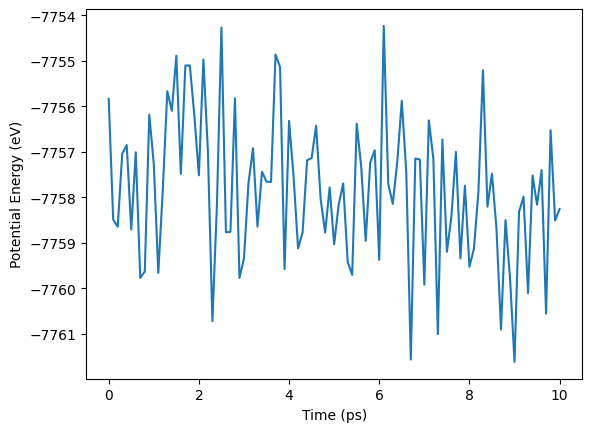

In [4]:
# Plot the potential energy
log.plot(x='Time', y='PotEng', xlabel='Time (ps)', ylabel='Potential Energy (eV)', legend=False)

<Axes: xlabel='Time (ps)', ylabel='Density (g/cm^3)'>

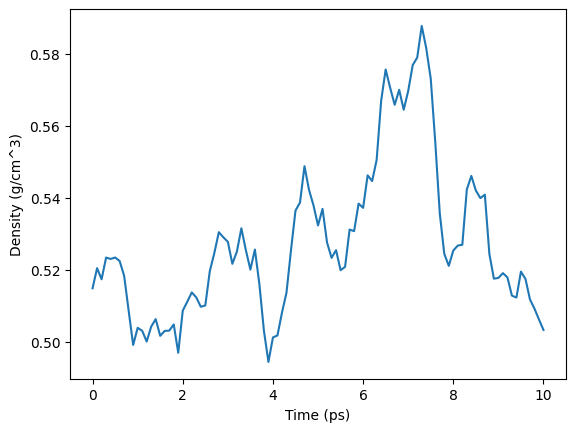

In [5]:
# Plot the density
log.plot(x='Time', y='Density', xlabel='Time (ps)', ylabel='Density (g/cm^3)', legend=False)

## 6.6. Species

In [2]:
!lmp -i in.spe -l log.spe

LAMMPS (2 Aug 2023 - Update 3)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from C:\Users\fitbe\AppData\Local\LAMMPS 64-bit 2Aug2023 with GUI\plugins
Reading data file ...
  orthogonal box = (0.29115105 0.29115105 -3.9795027) to (28.338849 28.338849 31.627781)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  1860 atoms
  reading velocities ...
  1860 velocities
  read_data CPU = 0.023 seconds
Reading potential file ffield.reax.cho with DATE: 2011-02-18

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Your simulation uses code contributions which should be cited:
- pair reaxff command: doi:10.1016/j.parco.2011.08.005
The log file lists these citations in BibTeX format.

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list

In [3]:
!type spe.spe

#  Timestep    No_Moles    No_Specs      C20H42
          1          30           1          30
